<a href="https://colab.research.google.com/github/Maks6666/ML/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D0%B4%D0%B5%D1%80%D0%B5%D0%B2%D0%B0_%D1%80%D1%96%D1%88%D0%B5%D0%BD%D1%8C_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/Used%20Car%20Dataset.csv", index_col="Unnamed: 0")
df.drop(columns=['car_name', 'registration_year', 'ownsership', 'transmission'], inplace=True)

Дані про ціни вживаних автомобілів у Індії
* car_name - назва авто у форматі 'рік компанія основна назва'
* registration_year - місяць та рік реєстрації
* ownsership - кількість власників у форматі 'Second owner'
* transmission - тип коробки передач
* insurance_validity - тип страховки
* fuel_type - вид палива
* seats - кількість сидінь
* kms_driven - пробіг
* manufacturing_year - рік виробництва, має тип object, потрібно застосувати astype(int)
* mileage(kmpl) - скільки кілометрів проїде за літр палива
* engine(cc) - об'єм двигуна у мл
* max_power(bhp) - потужність у кінських силах
* torque(Nm) - крутний момент двигуна
* price(in lakhs) - ціна у сто тисяч рупій

[Повний аналіз даних](https://www.kaggle.com/code/abdelrasoul/used-cars-prices-prediction)

In [51]:
df.head()

,insurance_validity,fuel_type,seats,kms_driven,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,Comprehensive,Petrol,5,56000,2017,7.81,2996.0,2996.0,333.0,63.75
1,Comprehensive,Petrol,5,30615,2020,17.40,999.0,999.0,9863.0,8.99
2,Comprehensive,Diesel,5,24000,2018,20.68,1995.0,1995.0,188.0,23.75
3,Comprehensive,Petrol,5,18378,2019,16.50,1353.0,1353.0,13808.0,13.56
4,Comprehensive,Petrol,5,44900,2019,14.67,1798.0,1798.0,17746.0,24.00


In [52]:
df = df[['fuel_type', 'kms_driven', 'engine(cc)', 'price(in lakhs)']]
df.head()

,fuel_type,kms_driven,engine(cc),price(in lakhs)
0,Petrol,56000,2996.0,63.75
1,Petrol,30615,999.0,8.99
2,Diesel,24000,1995.0,23.75
3,Petrol,18378,1353.0,13.56
4,Petrol,44900,1798.0,24.00


# Завдання 1
Очистіть дані від викидів(лише `price`), розділіть на тренувальну та тестову чатини

In [53]:
df.isnull().sum()

fuel_type          0
kms_driven         0
engine(cc)         3
price(in lakhs)    0
dtype: int64

In [54]:
from sklearn.model_selection import train_test_split


X = df.drop("price(in lakhs)", axis="columns")
y = df["price(in lakhs)"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Завдання 2
Створіть Pipeline для обробки даних

In [55]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeRegressor


num_cols = X.select_dtypes(include="number").columns
cat_cols = X.select_dtypes(include="object").columns

In [56]:
num_transformer = Pipeline(steps=[
    ("nn_imputing", KNNImputer(n_neighbors=3))
])


cat_transformer = Pipeline(steps=[
    ("encoding", OrdinalEncoder())
])


preprocessor = ColumnTransformer([
    ("numerical", num_transformer, num_cols),
    ("categorical", cat_transformer, cat_cols)
])


model = Pipeline([
    ("preprocessing", preprocessor),
    ("model", DecisionTreeRegressor(max_depth=3))

]
)

model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('nn_imputing',
                                                                   KNNImputer(n_neighbors=3))]),
                                                  Index(['kms_driven', 'engine(cc)'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoding',
                                                                   OrdinalEncoder())]),
                                                  Index(['fuel_type'], dtype='object'))])),
                ('model', DecisionTreeRegressor(max_depth=3))])

# Завдання 3
Створіть остаточну модель та натренуйте її

In [57]:
X_train

,fuel_type,kms_driven,engine(cc)
1289,Petrol,32997,796.0
1233,Diesel,32141,885.0
1208,Diesel,86001,1498.0
1253,Petrol,92000,1198.0
382,Petrol,42346,998.0
...,...,...,...
1130,Diesel,50000,1493.0
1294,Diesel,29200,1498.0
860,Diesel,120802,1248.0
1459,Diesel,49441,1396.0


In [58]:
y_train

1289     3.39
1233     6.00
1208     5.75
1253     3.60
382      3.01
        ...  
1130    13.90
1294     8.75
860      5.97
1459     4.89
1126     7.95
Name: price(in lakhs), Length: 1242, dtype: float64

In [59]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('nn_imputing',
                                                                   KNNImputer(n_neighbors=3))]),
                                                  Index(['kms_driven', 'engine(cc)'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoding',
                                                                   OrdinalEncoder())]),
                                                  Index(['fuel_type'], dtype='object'))])),
                ('model', DecisionTreeRegressor(max_depth=3))])

# Завдання 4
Виведіть основні метрики моделі

In [60]:
y_pred = model.predict(X_test)

In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


mae = mean_absolute_error(y_test, y_pred)
print(mae)
mse = mean_squared_error(y_test, y_pred)
print(mse)
r2 = r2_score(y_test, y_pred)
print(r2)



312.89337193397586
29015892.803267207
-0.003409753101932367


# Завдання 5
Змініть параметри моделі та попробуйте покращити результат

In [62]:
num_transformer = Pipeline(steps=[
    ("nn_imputing", KNNImputer(n_neighbors=3))
])


cat_transformer = Pipeline(steps=[
    ("encoding", OrdinalEncoder())
])


preprocessor = ColumnTransformer([
    ("numerical", num_transformer, num_cols),
    ("categorical", cat_transformer, cat_cols)
])




In [63]:
preprocessor.fit(X_train)
X_train = preprocessor.transform(X_train)


preprocessor.fit(X_test)
X_test = preprocessor.transform(X_test)


array([[7.64300e+03, 1.19700e+03, 3.00000e+00],
       [6.32490e+04, 1.19700e+03, 3.00000e+00],
       [6.80000e+04, 2.39300e+03, 2.00000e+00],
       [5.25650e+04, 1.19800e+03, 3.00000e+00],
       [7.00000e+04, 1.95000e+03, 2.00000e+00],
       [5.00000e+04, 4.66300e+03, 3.00000e+00],
       [7.60000e+04, 2.99500e+03, 3.00000e+00],
       [1.03030e+05, 1.49900e+03, 3.00000e+00],
       [5.64580e+04, 1.49800e+03, 2.00000e+00],
       [5.30000e+04, 1.49800e+03, 2.00000e+00],
       [3.20000e+04, 6.70500e+03, 3.00000e+00],
       [5.58610e+04, 1.39600e+03, 2.00000e+00],
       [4.70000e+04, 2.17900e+03, 2.00000e+00],
       [7.90000e+04, 1.13430e+04, 3.00000e+00],
       [4.80000e+04, 1.99900e+03, 2.00000e+00],
       [9.10000e+04, 1.49800e+03, 2.00000e+00],
       [2.50000e+04, 1.99100e+03, 3.00000e+00],
       [1.80000e+03, 1.19700e+03, 3.00000e+00],
       [1.64330e+04, 1.87400e+04, 3.00000e+00],
       [1.00000e+04, 1.49800e+03, 3.00000e+00],
       [2.55000e+04, 1.98400e+03, 3.0000

,max_depth,r2_score
0,1,-0.063761
1,2,-0.003383
2,3,-0.003410
3,4,-0.003435
4,5,-0.003439
5,6,-0.003441


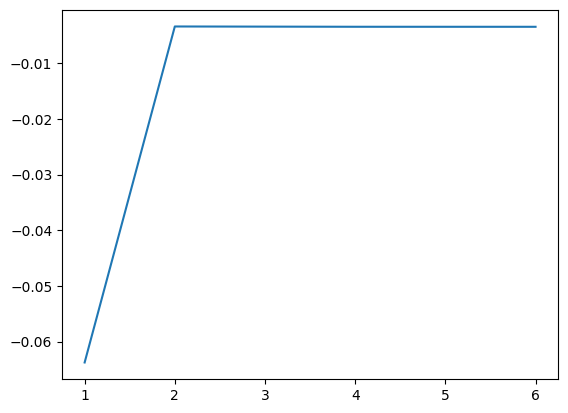

In [67]:
import matplotlib.pyplot as plt


results = []

for i in range(1, 7):
  model = DecisionTreeRegressor(max_depth=i)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  r2 = r2_score(y_test, y_pred)

  results.append({"max_depth": i, "r2_score": r2})


results = pd.DataFrame(results)
plt.plot(results["max_depth"], results["r2_score"])
results




# Завдання 6
Збережіть модель

In [70]:
import joblib

joblib.dump(model, "model.pkl")

['model.pkl']